# [Revisitado] Projeto #1 - Análise Exploratória de Dados

### Base de dados

<p style='text-align: justify;'><font size=3.5>A base de dados escolhida foi <b>Acidentes rodovias federais Brasil Jan/07 a Out/21</b> do Portal da Polícia Rodoviária Federal que possui registros das ocorrências de acidentes entre os anos de 2007 a 2021.</font></p>

<p style='text-align: justify;'><font size=3.5>Essa base foi selecionada com o objetivo de aplicar técnicas de mineração de dados visando a descoberta de informações que possam auxiliar na prevenção de acidentes</font></p>

> Fonte: MINISTÉRIO DA JUSTIÇA E SEGURANÇA PÚBLICA (Brasil). Polícia Rodoviária
Federal. **Dados Abertos: Acidentes**. [S. l.], 13 maio 2021. Disponível em:
https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes. Acesso em: 13 nov. 2021.

### Dicionário dos dados

| Atributo | Significado |
| --- | --- |
| id | identificador da ocorrência |
| pesid | identificador da pessoa envolvida |
| data_inversa | data da ocorrência |
| dia_semana | dia da semana da ocorrência |
| horario | horário da ocorrência |
| uf | unidade da federação |
| br  | identificador da BR do acidente |
| km | identificação do quilômetro onde ocorreu o acidente |
| municipio | nome do muncípio de ocorrência do acidente |
| causa_acidente | causa principal do acidente |
| tipo_acidente | identificação do tipo de acidente |
| classificacao_acidente | classificação quanto à gravidade do acidente |
| fase_dia | fase do dia no momento do acidente |
| sentido_via | sentido da via considerando o ponto de colisão |
| condicao_metereologica | condição meteorologica no momento do acidente |
| tipo_pista | tipo da pista considerando a quantidade de faixa |
| tracado_via | descrição do traçado da via |
| uso_solo | descrição sobre as características do local do acidente |
| id_veiculo | identificador do veículo envolvido |
| marca | descrição marca do veículo |
| ano_fabricacao_veiculo | ano de fabricação do veículo |
| tipo_envolvido | tipo de envolvido no acidente conforme sua participação no evento |
| estado_fisico | condição do envolvido conforme a gravidade das lesões |
| idade | idade do envolvido. O código '-1' indica que não foi possível coletar tal informação |
| sexo | sexo do envolvido. O valor 'inválido' indica que não foi possível coletar tal informação |

## Bibliotecas básicas e outros imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%run modules/text.py

%matplotlib inline
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

## Carregamento dos dados

In [2]:
df = pd.read_csv('dataset/acidentes_rodovias_brasileiras_2007_a_2021.csv', low_memory=False, encoding='utf-8')
print(f'Linhas: {df.shape[0]} | Coluna:  {df.shape[1]}')
df.head(2)

Linhas: 1906350 | Coluna:  26


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo
0,8.0,5018708.0,22/11/2014,Sábado,09:35:00,PR,376,335.6,ORTIGUEIRA,Defeito mecânico em veículo,Saída de Pista,(null),Pleno dia,Crescente,Chuva,Simples,Curva,Rural,18763467,Automóvel,FORD/ESCORT L ...,1987,Condutor,Ileso,34.0,Masculino
1,9.0,5019034.0,17/11/2014,Segunda,20:50:00,BA,324,530.0,FEIRA DE SANTANA,Ultrapassagem indevida,Colisão frontal,(null),Plena noite,Crescente,Chuva,Dupla,Curva,Urbano,18763578,Caminhonete,NISSAN/FRONTIER,2014,Condutor,Ileso,32.0,Masculino


## Remoção de features não utilizadas

In [3]:
df.drop(['horario', 
         'pesid', 
         'id_veiculo', 
         'marca', 
         'km',
         'ano_fabricacao_veiculo'], axis=1, inplace=True)

## Pré-processamento dos dados

### Remoção registros nulos

In [4]:
for col in df.columns:
    df.drop(df[df[col] == '(null)'].index, inplace=True)    
df.dropna(inplace=True)
print(f'Linhas: {df.shape[0]} | Coluna:  {df.shape[1]}')

Linhas: 1851374 | Coluna:  20


### Verificação dados nulos

In [5]:
print('Porcentagem de dados ausentes: ', df.isnull().sum().sum())

Porcentagem de dados ausentes:  0


### Limpeza dos dados

In [6]:
cols = ['causa_acidente', 
        'tipo_acidente', 
        'classificacao_acidente', 
        'fase_dia', 
        'sentido_via', 
        'condicao_metereologica', 
        'tipo_pista', 
        'tracado_via',
        'estado_fisico', 
        'tipo_envolvido',
        'tipo_veiculo',
        'sexo']

for c in cols:
    df[c] = df[c].apply(cleaning)

### Padronização do texto

In [7]:
for coluna in preprocessingFunctionsMap.keys():
    df[coluna] = df[coluna].apply(preprocessingFunctionsMap[coluna])

### Resetando o índice

In [8]:
df.reset_index(drop=True, inplace=True)

### Tratamento coluna data

In [9]:
df['data'] = pd.to_datetime(df['data_inversa'])
df['mes'] = df['data'].dt.month
df['ano'] = df['data'].dt.year
df.drop(['data_inversa'], axis=1, inplace=True)

#### Identifica os feriados nacionais

In [10]:
df['feriado'] = df['data'].apply(getFeriadoNacional)
df['feriado'] = df['feriado'].fillna('sem feriado')

### Remoção de valores inválidos

In [11]:
df.drop(df[df['idade'] == -1.0].index, inplace=True)
df.drop(df[df['idade'] > 99.0].index, inplace=True)
df.drop(df[df['tipo_veiculo'] == 'nao identificado'].index, inplace=True)
df.drop(df[df['tipo_veiculo'] == 'nao informado'].index, inplace=True)
df.drop(df[df['tracado_via'] == 'nao informado'].index, inplace=True)

for c in cols:
    df.drop(df[df[c] == 'ignorado'].index, inplace=True)

print(f'Linhas: {df.shape[0]} | Coluna:  {df.shape[1]}')

Linhas: 1674465 | Coluna:  23


### Correção tipagem dados

In [12]:
df['id'] = df['id'].astype('float')
df['idade'] = df['idade'].astype('int')

## Informação dos dados

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674465 entries, 1 to 1851373
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   id                      1674465 non-null  float64       
 1   dia_semana              1674465 non-null  object        
 2   uf                      1674465 non-null  object        
 3   br                      1674465 non-null  object        
 4   municipio               1674465 non-null  object        
 5   causa_acidente          1674465 non-null  object        
 6   tipo_acidente           1674465 non-null  object        
 7   classificacao_acidente  1674465 non-null  object        
 8   fase_dia                1674465 non-null  object        
 9   sentido_via             1674465 non-null  object        
 10  condicao_metereologica  1674465 non-null  object        
 11  tipo_pista              1674465 non-null  object        
 12  tracado_via   

## Geração de features

### Categorização da variável idade

> <p style='text-align: justify;'><font size=2.85>Categorização realizada de acordo com o estatuto da criança e adolescente (ECA).</font></p>

| faixa | categoria |
| --- | --- |
| 0-11 | criança |
| 12-17  | adolescente |
| 18-29 | jovem |
| 30-59 | adulto |
| acima de 60 | idoso |

In [14]:
labels = ['criança', 'adolescente', 'jovem', 'adulto', 'idoso']
classes = [0, 11, 17, 29, 59, 99]
df['faixa_etaria'] = pd.cut(x=df['idade'], bins=classes, labels=labels)

### Agrupamento da variável veículos

In [15]:
df['porte_veiculo'] = df['tipo_veiculo'].apply(mapTamanhoVeiculos)

### Agrupamento variável condição meteorológica

In [16]:
df['condicao_clima'] = df['condicao_metereologica'].map(mapClima)

## Análise exploratória dos dados

### Acidentes por período

Por ano

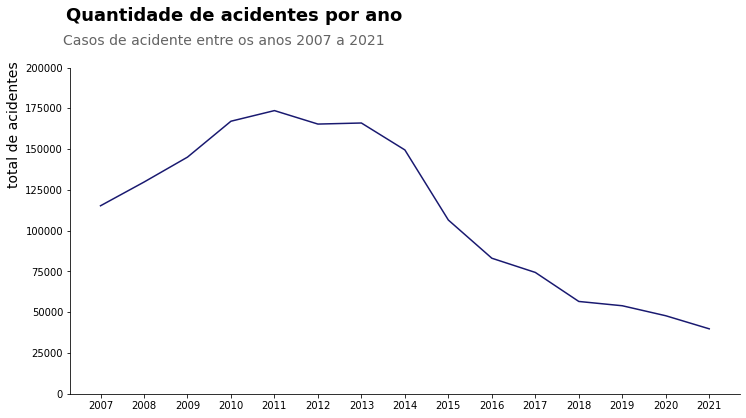

In [17]:
suptitle = 'Quantidade de acidentes por ano'
title = 'Casos de acidente entre os anos 2007 a 2021'

ticks = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

total_acidentes = df.groupby(['ano'])['id'].count()
total_acidentes.plot.line(figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('total de acidentes', fontsize=14, horizontalalignment='left', y=0.63)
plt.xlabel(None)
plt.xticks(ticks)
plt.ylim(0, 200000)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Houve um aumento gradativo das ocorrências de acidentes entre 2007 e 2011. Tivemos uma pequena queda em 2012 e após um aumento em 2013, as ocorrências voltaram a cair e mativeram esse padrão de queda com pequenos picos no decorrer dos anos. O motivo dessa queda nos acidentes, pode ser porque em maio de 2011 a ONU promulgou a 'Década de Ação pela Segurança no Trânsito' com a meta de reduzir em até 50% os sinistros em todo o mundo.</font></p>

Por mês

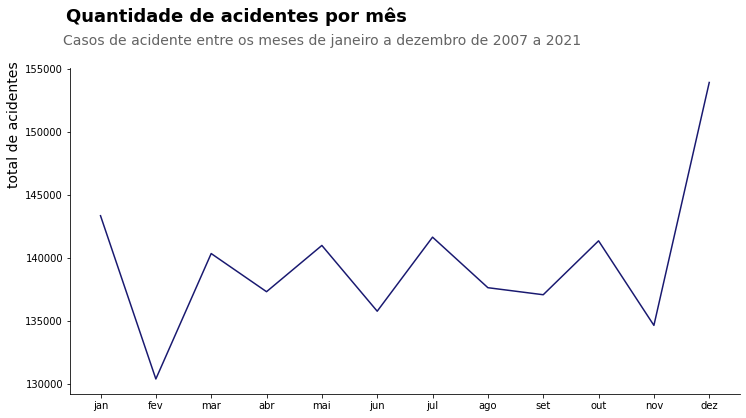

In [18]:
suptitle = 'Quantidade de acidentes por mês'
title = 'Casos de acidente entre os meses de janeiro a dezembro de 2007 a 2021'

ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

total_acidentes = df.groupby(['mes'])['id'].count()
total_acidentes.plot.line(figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('total de acidentes', fontsize=14, horizontalalignment='left', y=0.63)
plt.xlabel(None)
plt.xticks(ticks, labels)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Os meses de dezembro e janeiro concentram a maior parte dos casos. Um possível motivo é o fato de serem o período de férias escolares.</font></p>

Dias da semana

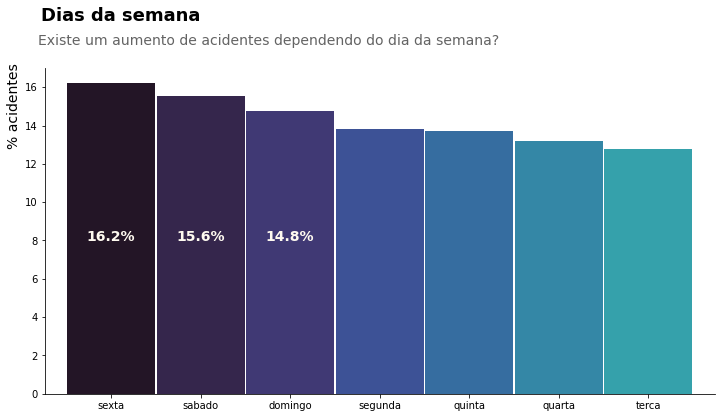

In [19]:
suptitle = 'Dias da semana'
title = 'Existe um aumento de acidentes dependendo do dia da semana?'

percentual = round(df['dia_semana'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.98, figsize=(12, 6), rot=False, color=sns.color_palette('mako', n_colors=10)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 8, '16.2%', color='#FFFAF0', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 8, '15.6%', color='#FFFAF0', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(2, 8, '14.8%', color='#FFFAF0', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Os dias considerados como fim de semana apresentam as maiores taxas de acidentes, analisando de forma isolada. Porém de forma agrupada, os dias úteis concentram 53,5% dos acidentes. Podemos observar que a maioria dos acidentes ocorreram às sextas-feiras, seria importante analisar se isso está associado ao aumento na quantidade de veículos.</font></p>

### Gravidade dos acidentes

Classificação de acidentes

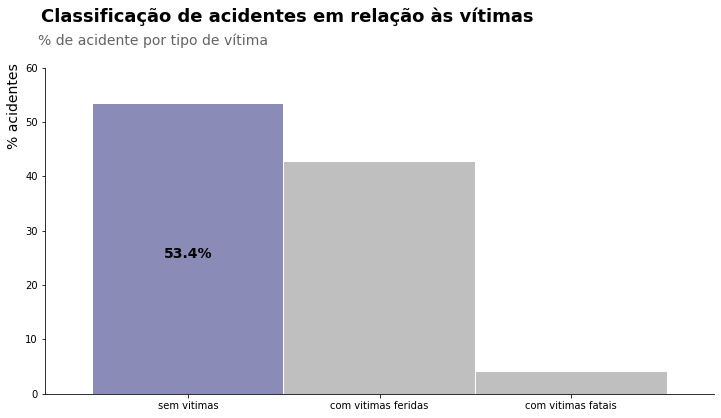

In [20]:
suptitle = 'Classificação de acidentes em relação às vítimas'
title = '% de acidente por tipo de vítima'
colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['classificacao_acidente'].value_counts(normalize=True) * 100, 2)
percentual[:3].plot.bar(width=0.993, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.text(0, 25, '53.4%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylim(0, 60)
plt.show()

> <p style='text-align: justify;'><font size=2.85>53% dos acidentes ocorridos entre 2007 e 2021 foram sem vítimas.</font></p>

Estado físico dos envolvidos

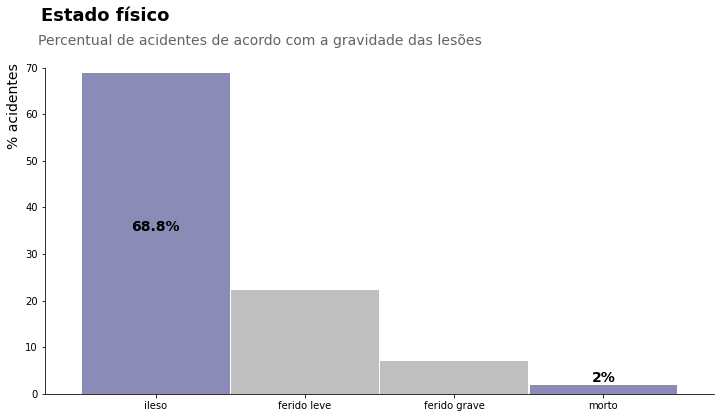

In [21]:
suptitle = 'Estado físico'
title = 'Percentual de acidentes de acordo com a gravidade das lesões'

colors=['#191970', '#808080', '#808080', '#191970']

percentual = round(df['estado_fisico'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.text(0, 35, '68.8%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(3, 2.5, '2%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.ylim(0, 70)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Na maioria dos acidentes, os envolvidos sairam sem ferimentos. Cerca de 2% dessas ocorrências tiveram vítimas fatais.</font></p>

Tipo de envolvido nas ocorrências

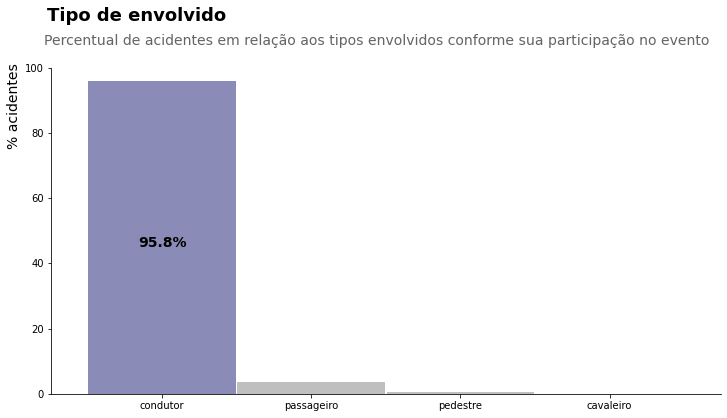

In [22]:
suptitle = 'Tipo de envolvido'
title = 'Percentual de acidentes em relação aos tipos envolvidos conforme sua participação no evento'

colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['tipo_envolvido'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.text(0, 45, '95.8%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.ylim(0, 100)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Em quase 96% dos acidentes, o condutor teve participação no evento.</font></p>

Vítimas por idade e sexo biológico

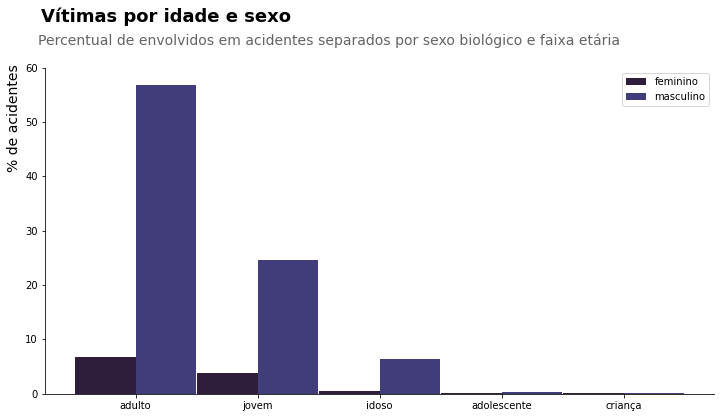

In [23]:
sample = df[['faixa_etaria', 'sexo']]
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='faixa_etaria', columns='sexo', aggfunc=np.sum)

for col in df_pivot.columns:
    df_pivot[col] = round((df_pivot[col]/df.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by='masculino', ascending=False)


suptitle = 'Vítimas por idade e sexo'
title = 'Percentual de envolvidos em acidentes separados por sexo biológico e faixa etária'

df_pivot.plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.legend()
plt.ylim(0, 60)
plt.show()

> <p style='text-align: justify;'>Os maiores envolvidos em acidentes nas rodovias federais brasileiras são adultos com idade entre 30 e 59 anos, somando 64% das ocorrências. Pessoas do sexo masculino são maioria nas ocorrências para todas as faixas de idade.<font size=2.85></font></p>

Mortalidade no trânsito por idade e sexo biológico

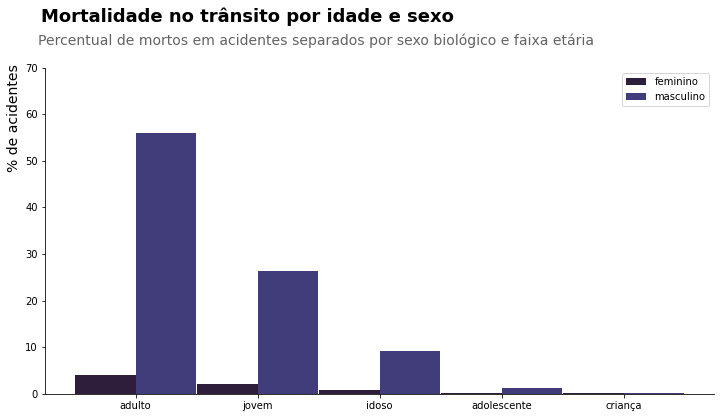

In [24]:
sample = df[['faixa_etaria', 'sexo', 'estado_fisico']].query('estado_fisico=="morto"')
sample.drop(['estado_fisico'], axis=1, inplace=True)
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='faixa_etaria', columns='sexo', aggfunc=np.sum)

for col in df_pivot.columns:
    df_pivot[col] = round((df_pivot[col]/sample.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by='masculino', ascending=False)

suptitle = 'Mortalidade no trânsito por idade e sexo'
title = 'Percentual de mortos em acidentes separados por sexo biológico e faixa etária'

df_pivot.plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.legend()
plt.ylim(0, 70)
plt.show()

> <p style='text-align: justify;'>56% das vítimas fatais são homens adultos. 28% é a parcela de jovens, de ambos os sexos, mortos em acidentes rodoviários.<font size=2.85></font></p>

### Análise por estados

Estados

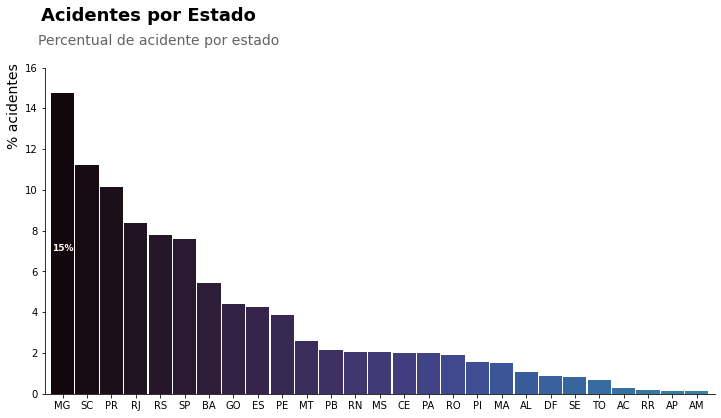

In [25]:
suptitle = 'Acidentes por Estado'
title = 'Percentual de acidente por estado'

percentual = round(df['uf'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.95, figsize=(12, 6), rot=False, color=sns.color_palette('mako', n_colors=50)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 7, '15%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.ylim(0, 16)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Minas Gerais é o estado com o maior índice de acidentes, provavelmente por possuir a maior malha rodoviária do país. Segundo dados do Estado, essa malha é equivalente a cerca de 16% do somatório de rodovias estaduais, federais e municipais de toda a malha viária existente no país. Apenas em MG, são 272.062,90 km de rodovias, sendo 9.205 km de rodovias federais.</font></p>

Vítimas por Estado

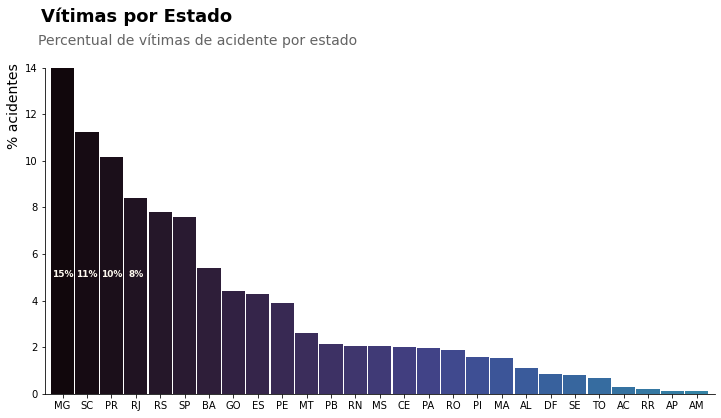

In [26]:
suptitle = 'Vítimas por Estado'
title = 'Percentual de vítimas de acidente por estado'

percentual = round(df['uf'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.95, figsize=(12, 6), rot=False, color=sns.color_palette('mako', n_colors=50)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 5, '15%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.text(1, 5, '11%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.text(2, 5, '10%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.text(3, 5, '8%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.ylim(0, 14)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Minas Gerais, Santa Catarina, Paraná e Rio de Janeiro concentram 44% de acidentes com vítimas nas rodovias federais.</font></p>

Vítimas fatais

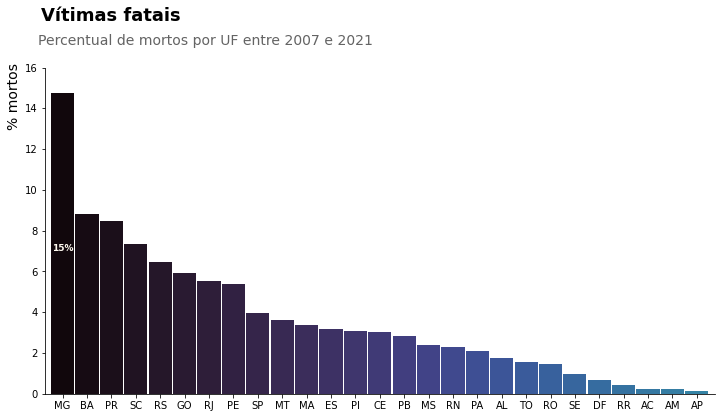

In [27]:
suptitle = 'Vítimas fatais'
title = 'Percentual de mortos por UF entre 2007 e 2021'

mortos = df.query('estado_fisico=="morto"')
percentual = round(mortos['uf'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.95, figsize=(12, 6), rot=False, color=sns.color_palette('mako', n_colors=50)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% mortos', fontsize=14, horizontalalignment='left', y=0.81)
plt.text(0, 7, '15%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.grid(False)
plt.xlabel(None)
plt.ylim(0, 16)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Minas Gerais possui a maior quantidade de mortes em acidentes nas rodovias com 15%.</font></p>

Minas Gerais

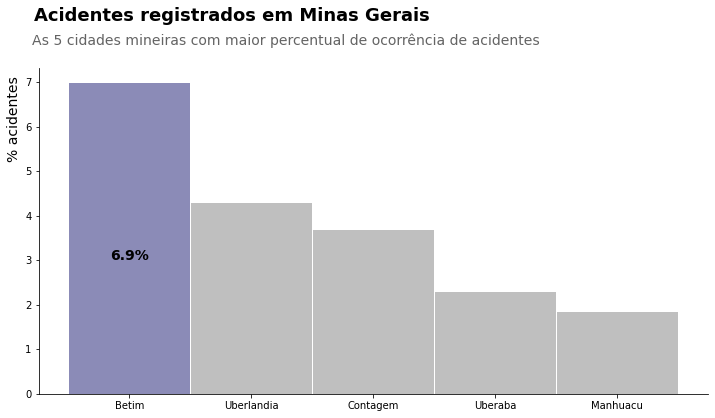

In [28]:
suptitle = 'Acidentes registrados em Minas Gerais'
title = 'As 5 cidades mineiras com maior percentual de ocorrência de acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

municipios = municipios = df.query('uf== "MG"')
percentual = round(municipios['municipio'].value_counts(normalize=True) * 100, 2).head(5)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.71)
plt.text(0, 3, '6.9%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Betim lidera sendo a cidade mineira com maior percentual de acidentes.</font></p>

### Rodovias federais

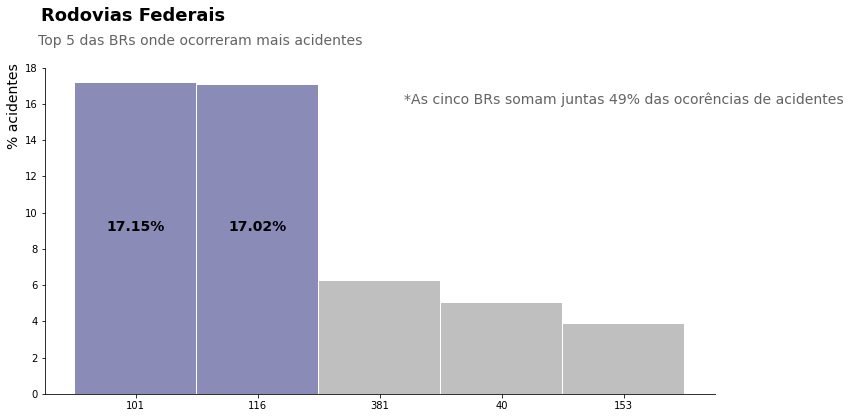

In [29]:
suptitle = 'Rodovias Federais'
title = 'Top 5 das BRs onde ocorreram mais acidentes'

aviso = '*As cinco BRs somam juntas 49% das ocorências de acidentes'
colors=['#191970', '#191970', '#808080', '#808080', '#808080']

percentual = round(df['br'].value_counts(normalize=True) * 100, 2).head(5)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.text(4, 16, aviso, fontsize=14, color='#646464', horizontalalignment='center')
plt.text(0, 9, '17.15%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 9, '17.02%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 18)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>As BR101, BR116, BR381, BR40 e BR153 são as rodovias federais com maior número de acidentes. Sendo as BRs 101 e 116 os trechos com as maiores taxas. A BR116 é ao lado da BR101 um dos principais eixos rodoviários do país. Juntas, elas somam 9136 km de extensão.</font></p>

### Causas de acidentes

Causas de acidentes

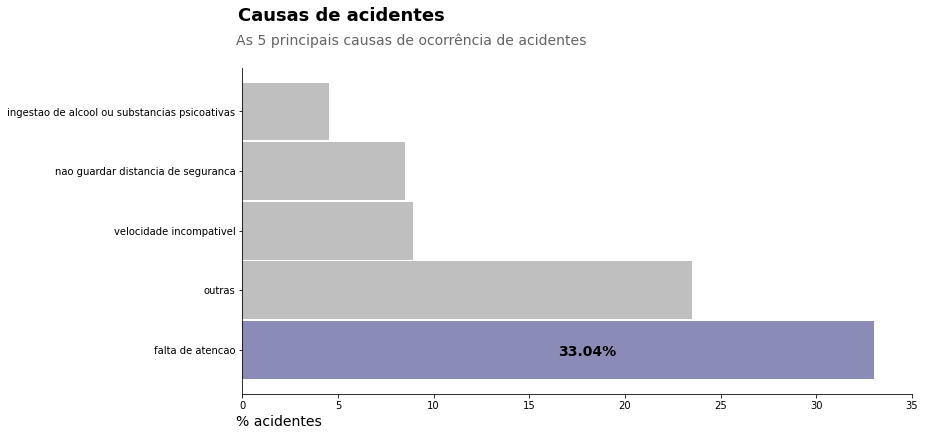

In [30]:
suptitle = 'Causas de acidentes'
title = 'As 5 principais causas de ocorrência de acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['causa_acidente'].value_counts(normalize=True)*100, 2).head(5)
percentual.plot.barh(width=0.97, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(18, -0.1, '33.04%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlim(0, 35)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>A principal causa de acidentes é a falta de atenção, com 33% de ocorrências nesse período.</font></p>

Gravidade em relação à causa

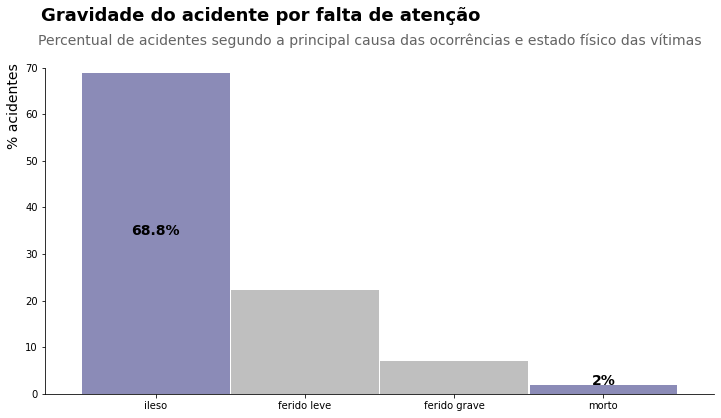

In [31]:
sample = df.query('causa_acidente=="falta de atencao"')

suptitle = 'Gravidade do acidente por falta de atenção'
title = 'Percentual de acidentes segundo a principal causa das ocorrências e estado físico das vítimas'

colors=['#191970', '#808080', '#808080', '#191970']

percentual = round(df['estado_fisico'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.text(0, 34, '68.8%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(3, 2, '2%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 70)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>A maioria dos acidentes ocorridos por falta de atenção foram sem vítimas e 2% resultaram em óbito.</font></p>

### Tipos de acidente

Tipos de acidentes

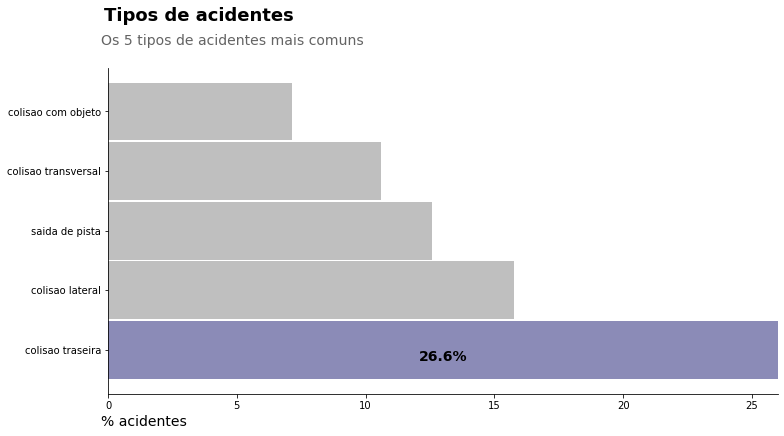

In [32]:
suptitle = 'Tipos de acidentes'
title = 'Os 5 tipos de acidentes mais comuns'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['tipo_acidente'].value_counts(normalize=True) * 100, 2).head(5)
percentual.plot.barh(width=0.97, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(13, -0.18, '26.6%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlim(0, 26)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>O tipo mais comum de acidente é colisão traseira.</font></p>

Gravidade por tipo

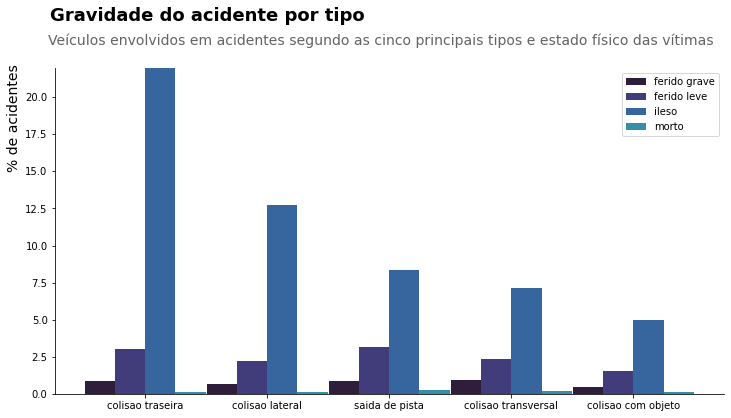

In [33]:
sample = df[['estado_fisico', 'tipo_acidente']]
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='tipo_acidente', columns='estado_fisico', aggfunc=np.sum)

df_pivot['total'] = 0.0
for col in df_pivot.index:
    df_pivot['total'].loc[col] = df_pivot.loc[col].sum(axis=0)

for col in df_pivot.columns:
    df_pivot[col] = round((df_pivot[col]/df.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by=['total', 'ileso'], ascending=False)

suptitle = 'Gravidade do acidente por tipo'
title = 'Veículos envolvidos em acidentes segundo as cinco principais tipos e estado físico das vítimas'

df_pivot.head().drop(['total'], axis=1).plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(0, 22)
plt.legend()
plt.show()

> <p style='text-align: justify;'><font size=2.85>Temos maior letalidade para acidentes com saída da pista e temos a colisão transversal como responsável pela maioria dos ferimentos graves.</font></p>

### Veículos envolvidos

Tipo de veículo

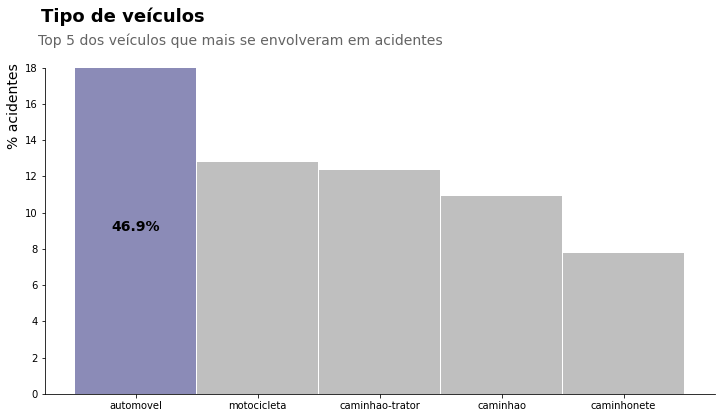

In [34]:
suptitle = 'Tipo de veículos'
title = 'Top 5 dos veículos que mais se envolveram em acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['tipo_veiculo'].value_counts(normalize=True) * 100, 2).head(5)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.text(0, 9, '46.9%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.ylim(0, 18)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>47% dos acidentes envolveram veículos do tipo automóvel.</font></p>

Porte do veículo

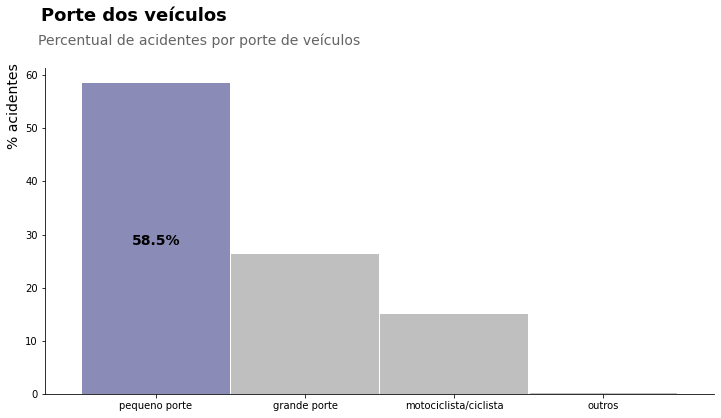

In [35]:
suptitle = 'Porte dos veículos'
title = 'Percentual de acidentes por porte de veículos'

colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['porte_veiculo'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.text(0, 28, '58.5%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'>Veículos de pequeno porte, como automóveis e utilitários, contribuiram para  cerca de 59% dos acidentes rodoviários.<font size=2.85></font></p>

Gravidade do acidente por porte de veículo

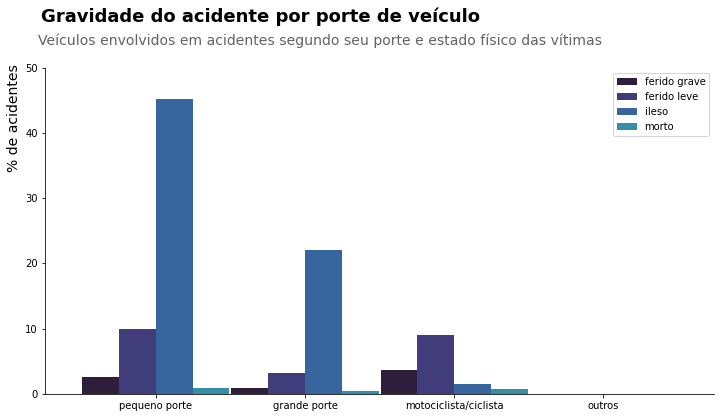

In [36]:
sample = df[['estado_fisico', 'porte_veiculo']]
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='porte_veiculo', columns='estado_fisico', aggfunc=np.sum)

for col in df_pivot.columns:
    df_pivot.fillna(0, inplace=True)
    df_pivot[col] = df_pivot[col].astype(int)
    df_pivot[col] = round((df_pivot[col]/df.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by='ileso', ascending=False)

suptitle = 'Gravidade do acidente por porte de veículo'
title = 'Veículos envolvidos em acidentes segundo seu porte e estado físico das vítimas'

df_pivot.plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(0, 50)
plt.legend()
plt.show()

> <p style='text-align: justify;'>Pelo gráfico temos que os veículos com maior contribuição para os acidentes em rodovias foram os de pequeno porte. Podemos perceber ainda que poucas vítimas saem ilesas em acidentes envolvendo motos ou bicicletas. <font size=2.85></font></p>

Mortes por tipo de veículo

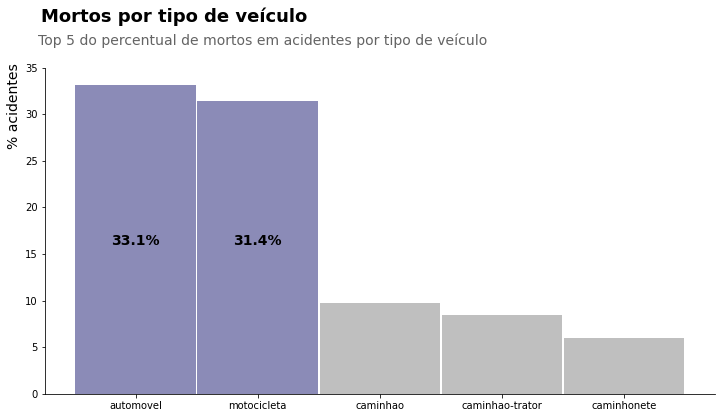

In [37]:
suptitle = 'Mortos por tipo de veículo'
title = 'Top 5 do percentual de mortos em acidentes por tipo de veículo'

colors=['#191970', '#191970', '#808080', '#808080', '#808080']

mortos = df.query('estado_fisico=="morto"')
percentual = round(mortos['tipo_veiculo'].value_counts(normalize=True) * 100, 2).head(5)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 16, '33.1%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 16, '31.4%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylim(0, 35)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>A participação de automóveis e motocicletas em acidentes fatais somam 64,5%.</font></p>

### Acidentes envolvendo pedestres

Tipos de acidentes

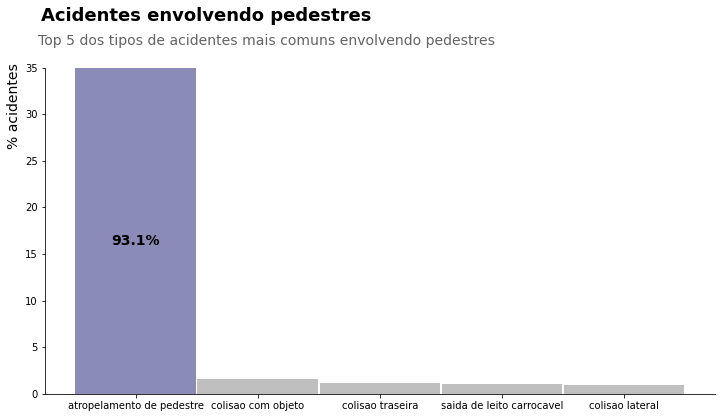

In [38]:
suptitle = 'Acidentes envolvendo pedestres'
title = 'Top 5 dos tipos de acidentes mais comuns envolvendo pedestres'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

pedestres = df.query('tipo_envolvido=="pedestre"')
percentual = round(pedestres['tipo_acidente'].value_counts(normalize=True) * 100, 2).head(5)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 16, '93.1%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylim(0, 35)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Como esperado, 93% dos acidentes envolvendo pedestres são atropelamentos.</font></p>

Gravidade dos atropelamentos de pedestres

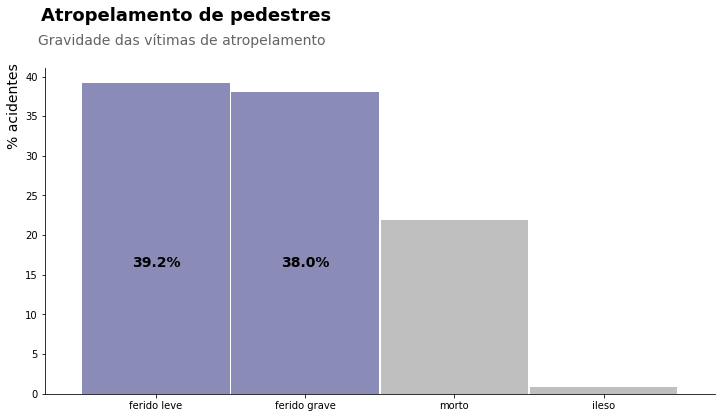

In [39]:
suptitle = 'Atropelamento de pedestres'
title = 'Gravidade das vítimas de atropelamento'

colors=['#191970', '#191970', '#808080', '#808080']

atropelamentos = df.query('tipo_envolvido=="pedestre" and tipo_acidente=="atropelamento de pedestre"')
percentual = round(atropelamentos['estado_fisico'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 16, '39.2%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 16, '38.0%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'>Mais de 77% das vítimas de atropelamento saíram feridas. Vemos também que é bem raro, vítimas ilesas nesse tipo de acidente.<font size=2.85></font></p>

Mortes envolvendo pedestres

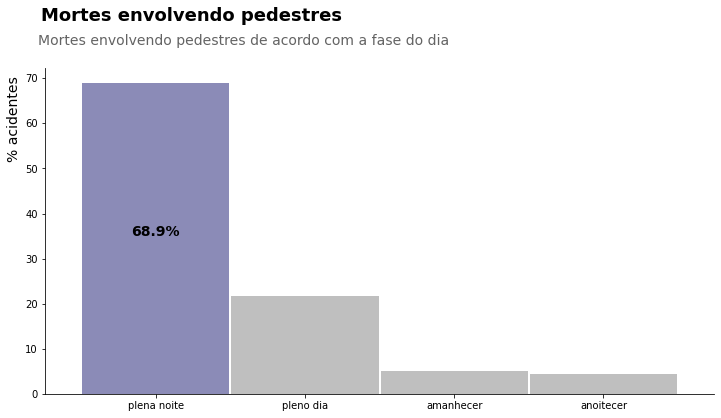

In [40]:
suptitle = 'Mortes envolvendo pedestres'
title = 'Mortes envolvendo pedestres de acordo com a fase do dia'

colors=['#191970', '#808080', '#808080', '#808080']

mortes_pedestres = df.query('tipo_envolvido=="pedestre" and estado_fisico=="morto"')
percentual = round(mortes_pedestres['fase_dia'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.71)
plt.text(0, 35, '68.9%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'>É possível perceber que as mortes envolvendo pedestres são, pelo menos, três vezes maiores à noite do que durante o dia.<font size=2.85></font></p>

### Fase do dia

Fase do dia

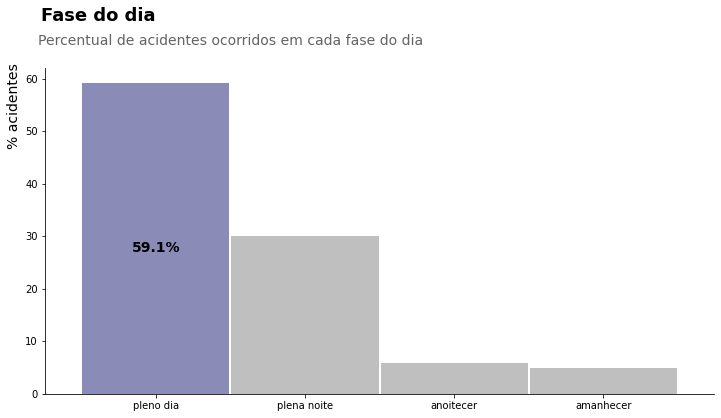

In [41]:
suptitle = 'Fase do dia'
title = 'Percentual de acidentes ocorridos em cada fase do dia'

colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['fase_dia'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 27, '59.1%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Em média, 59% dos acidentes ocorreram durante o dia.</font></p>

Gravidade por fase do dia

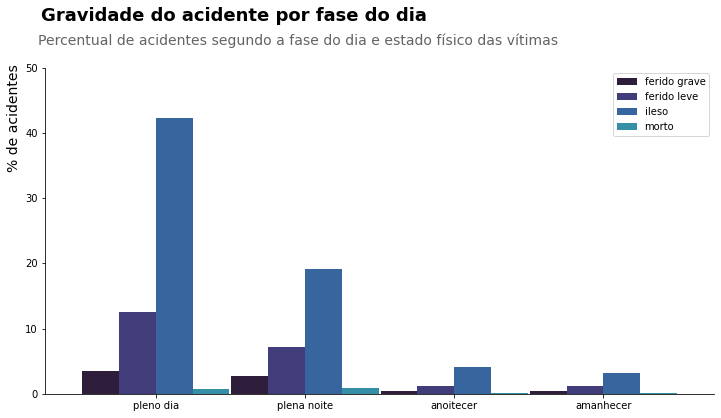

In [42]:
sample = df[['estado_fisico', 'fase_dia']]
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='fase_dia', columns='estado_fisico', aggfunc=np.sum)

for col in df_pivot.columns:
    df_pivot[col] = round((df_pivot[col]/df.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by='ileso', ascending=False)

suptitle = 'Gravidade do acidente por fase do dia'
title = 'Percentual de acidentes segundo a fase do dia e estado físico das vítimas'

df_pivot.plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(0, 50)
plt.legend()
plt.show()

> <p style='text-align: justify;'><font size=2.85>Embora a maioria dos acidentes tenham ocorrido durante o período do dia, podemos notar que a acidentes com vítimas fatais é maior a noite (0,93%).</font></p>

### Traçado da via

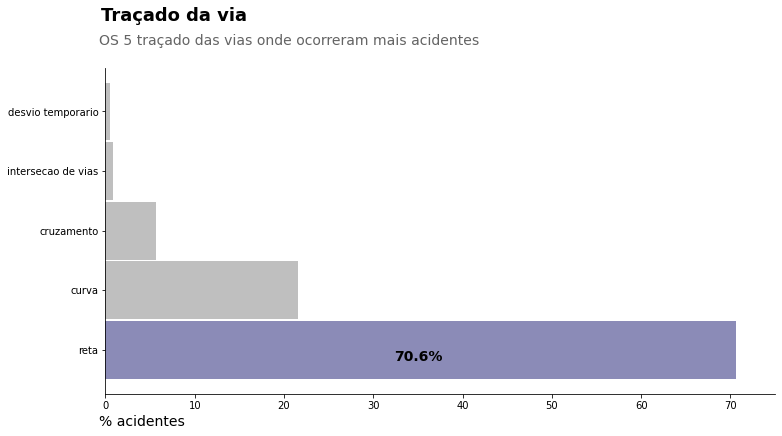

In [43]:
suptitle = 'Traçado da via'
title = 'OS 5 traçado das vias onde ocorreram mais acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['tracado_via'].value_counts(normalize=True) * 100, 2).head(5)
percentual.plot.barh(width=0.97, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(35, -0.18, '70.6%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlim(0, 75)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Cerca de 70% das ocorrências foram em pistas com traçado reto.</font></p>

### Tipo de pista

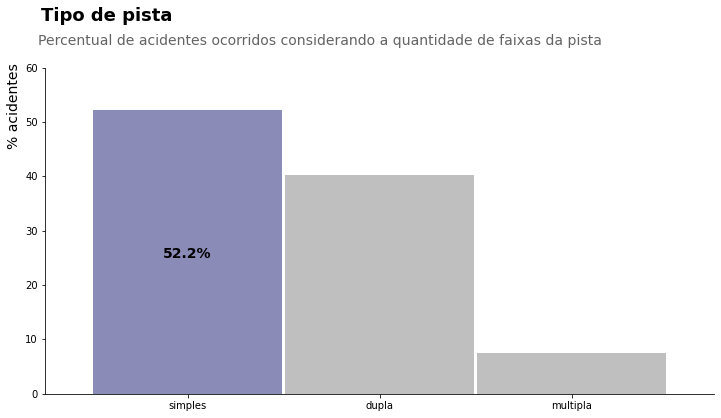

In [44]:
suptitle = 'Tipo de pista'
title = 'Percentual de acidentes ocorridos considerando a quantidade de faixas da pista'

colors=['#191970', '#808080', '#808080']

percentual = round(df['tipo_pista'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 25, '52.2%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.ylim(0, 60)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Mais da metade dos acidentes ocorreu em pistas simples.</font></p>

### Condição meteorológica

Clima durante as ocorrências

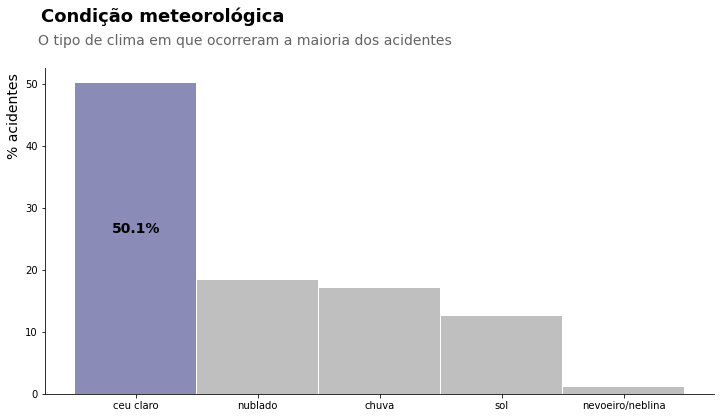

In [45]:
suptitle = 'Condição meteorológica'
title = 'O tipo de clima em que ocorreram a maioria dos acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['condicao_metereologica'].value_counts(normalize=True)*100, 2).head(5)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.72)
plt.text(0, 26, '50.1%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Metade dos acidentes ocorreram em dias de céu claro.</font></p>

Gravidade do acidente por condição meteorológia

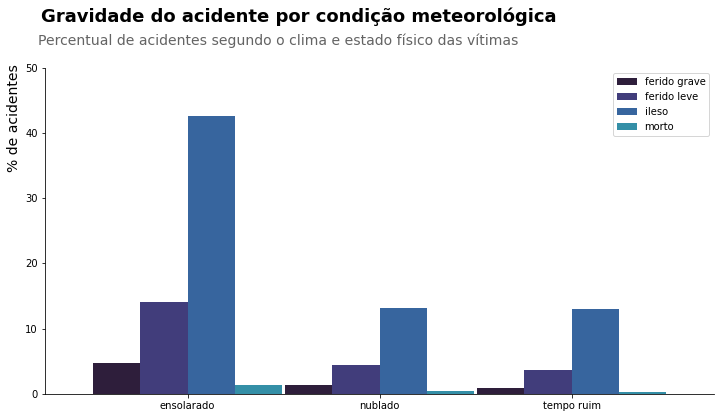

In [46]:
sample = df[['estado_fisico', 'condicao_clima']]
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='condicao_clima', columns='estado_fisico', aggfunc=np.sum)

for col in df_pivot.columns:
    df_pivot[col] = round((df_pivot[col]/df.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by='ileso', ascending=False)

suptitle = 'Gravidade do acidente por condição meteorológica'
title = 'Percentual de acidentes segundo o clima e estado físico das vítimas'

df_pivot.plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(0, 50)
plt.legend()
plt.show()

> <p style='text-align: justify;'><font size=2.85>Temos que 43% dos acidentes ocorridos em dias ensolarados não resultaram em vítimas. Podemos observar também que, dos 2% dos acidentes fatais, mais da metade ocorreu em dias de sol (1,3%).</font></p>

### Uso do solo

Uso do solo

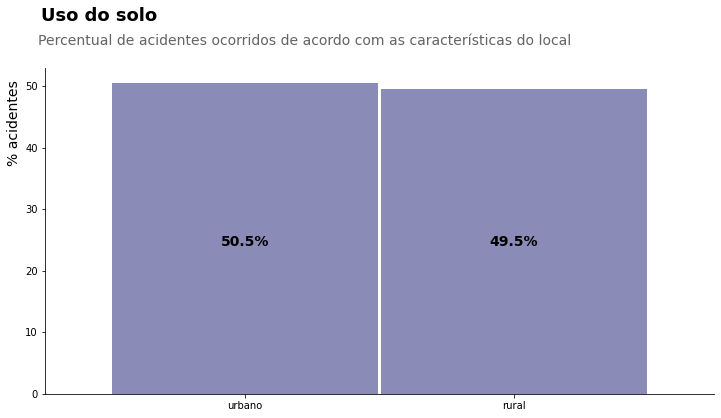

In [47]:
suptitle = 'Uso do solo'
title = 'Percentual de acidentes ocorridos de acordo com as características do local'

percentual = round(df['uso_solo'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.70)
plt.text(0, 24, '50.5%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 24, '49.5%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Parece não existir uma grande variação na ocorrência de acidentes considerando se é cidade ou zona rural.</font></p>

Gravidade de acordo com o uso do solo

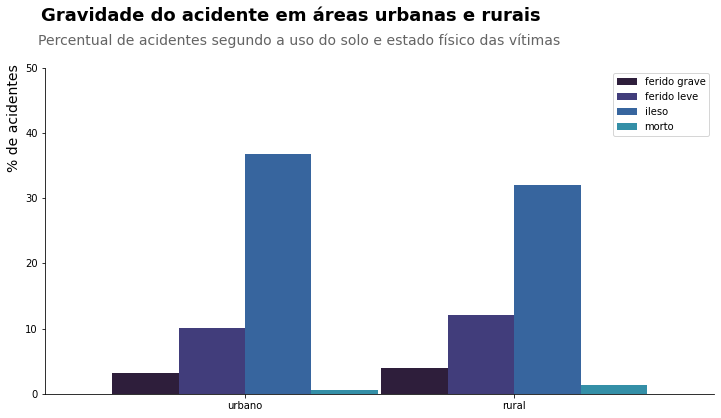

In [48]:
sample = df[['estado_fisico', 'uso_solo']]
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='uso_solo', columns='estado_fisico', aggfunc=np.sum)

for col in df_pivot.columns:
    df_pivot[col] = round((df_pivot[col]/df.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by='ileso', ascending=False)

suptitle = 'Gravidade do acidente em áreas urbanas e rurais'
title = 'Percentual de acidentes segundo a uso do solo e estado físico das vítimas'

df_pivot.plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(0, 50)
plt.legend()
plt.show()

> <p style='text-align: justify;'><font size=2.85>Acidentes ocorridos em áreas rurais apresentam mais letalidade (1,4%) e mais ferimentos graves (3,9%) em relação aos urbanos.</font></p>

### Estação do ano

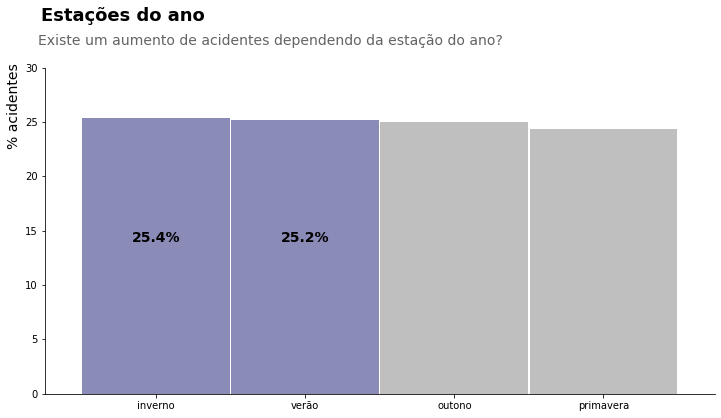

In [49]:
suptitle = 'Estações do ano'
title = 'Existe um aumento de acidentes dependendo da estação do ano?'

colors=['#191970', '#191970', '#808080', '#808080']

df['estacao_do_ano'] = df['data'].apply(mapEstacaoAno)

percentual = round(df['estacao_do_ano'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 14, '25.4%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 14, '25.2%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.ylim(0, 30)
plt.show()

> <p style='text-align: justify;'><font size=2.85>De uma maneira geral, a quantidade de acidentes não aumenta ou diminui dependendo da estação do ano. Por exemplo, a diferença entre o % de acidentes entre o verão e inverno é baixa, sendo de 0.2%.</font></p>

### Região do Brasil

Acidentes por região

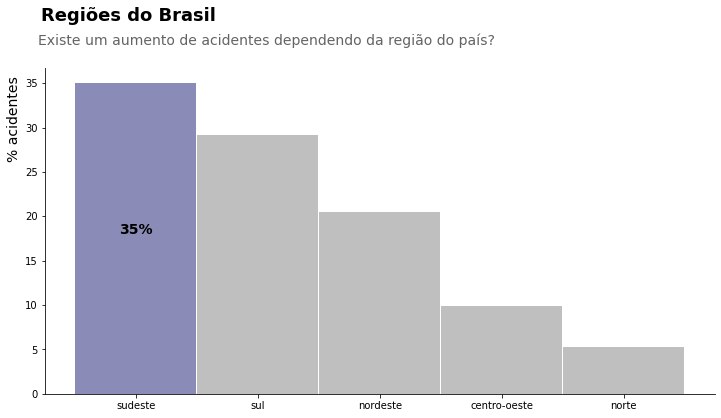

In [50]:
suptitle = 'Regiões do Brasil'
title = 'Existe um aumento de acidentes dependendo da região do país?'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

df['regiao_pais'] = df['uf'].apply(mapRegiaoPais)
percentual = round(df['regiao_pais'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.71)
plt.text(0, 18, '35%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>A quantidade de acidentes parece aumentar ou diminuir a depender da região do país. O Sudeste possui maior taxa de acidentes entre 2007 e 2021. Um dos motivos pode ser o fato de ser a região mais populosa e industrializada do Brasil. Segundo dados sobre frotas (disponível no site do governo federal) até outubro de 2021, a frota de automóveis dessa região representa 48% da frota nacional.</font></p>

Gravidade por região

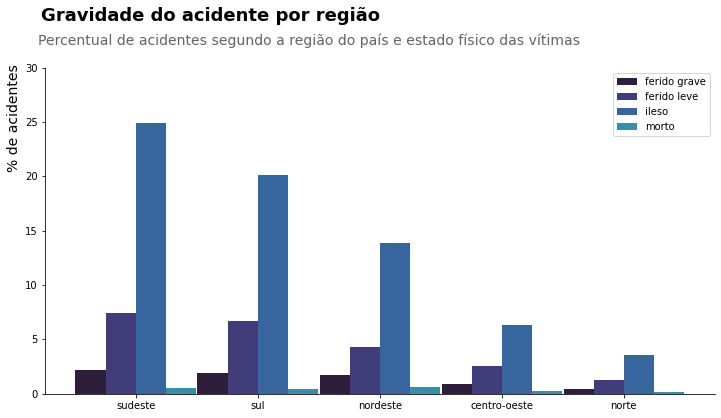

In [51]:
sample = df[['estado_fisico', 'regiao_pais']]
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='regiao_pais', columns='estado_fisico', aggfunc=np.sum)

for col in df_pivot.columns:
    df_pivot[col] = round((df_pivot[col]/df.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by='ileso', ascending=False)

suptitle = 'Gravidade do acidente por região'
title = 'Percentual de acidentes segundo a região do país e estado físico das vítimas'

df_pivot.plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(0, 30)
plt.legend()
plt.show()

> <p style='text-align: justify;'><font size=2.85>Os acidentes com mais vítimas fatais ocorreram na região nordestina. O sudeste assume a liderança em relação aos demais estados físicos.</font></p>

### Feriado nacional

Feriado x não feriado

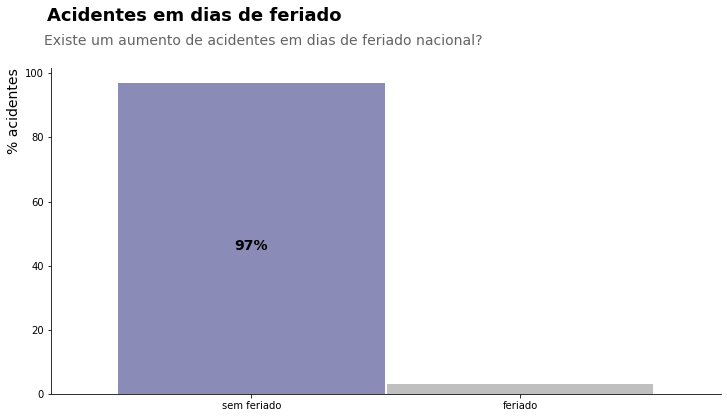

In [52]:
suptitle = 'Acidentes em dias de feriado'
title = 'Existe um aumento de acidentes em dias de feriado nacional?'

colors=['#191970', '#808080']

df['feriado_agrupado'] = df['feriado'].apply(mapFeriadoEnaoFeriado)

percentual = round(df['feriado_agrupado'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.735)
plt.text(0, 45, '97%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>97% dos acidentes ocorreram em dias de não feriado, o que era esperado, uma vez que só temos 11 feriados nacionais por ano.</font></p>

Acidentes no Feriado

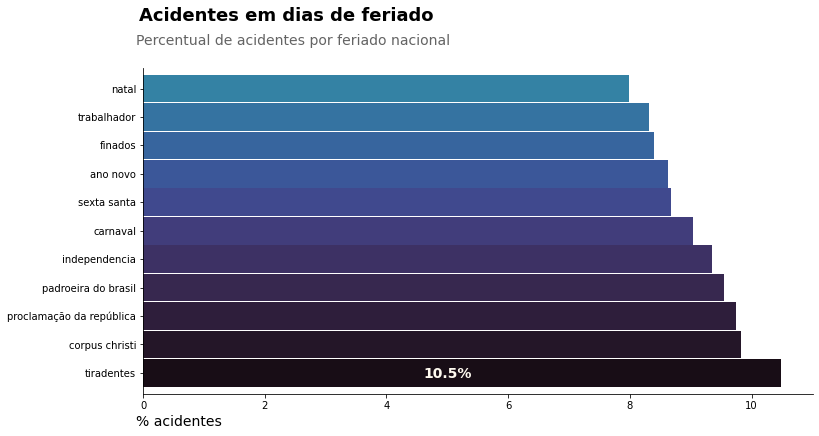

In [53]:
suptitle = 'Acidentes em dias de feriado'
title = 'Percentual de acidentes por feriado nacional'

sample = df.query('feriado!="sem feriado"')

percentual = round(sample['feriado'].value_counts(normalize=True)*100, 2)
percentual.plot.barh(width=0.97, figsize=(12, 6), rot=False, color=sns.color_palette('mako', n_colors=20)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(5, -0.18, '10.5%', fontsize=14, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'>Os acidentes parecem estarem distribuidos de maneira bem parecida entre os feriados. Temos Tiradentes com o percentual maior de ocorrências.<font size=2.85></font></p>

Gravidade dos acidentes por feriado

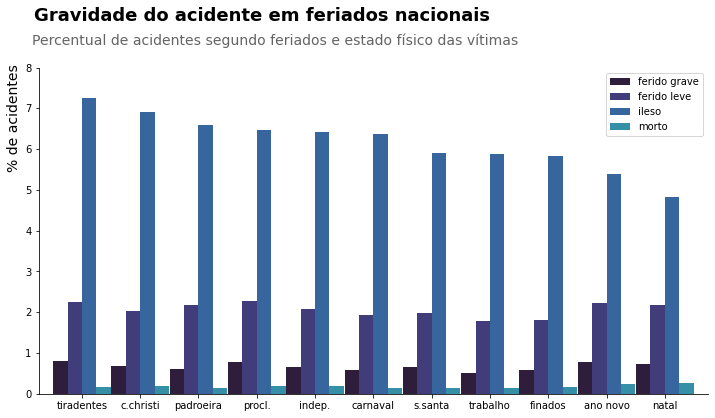

In [54]:
sample = df.query('feriado!="sem feriado"')
sample = sample[['estado_fisico', 'feriado']]
sample['count'] = 1

df_pivot = pd.pivot_table(sample, values='count', index='feriado', columns='estado_fisico', aggfunc=np.sum)

for col in df_pivot.columns:
    df_pivot[col] = round((df_pivot[col]/sample.shape[0])*100, 2)
df_pivot = df_pivot.sort_values(by='ileso', ascending=False)

ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['tiradentes', 'c.christi', 'padroeira', 'procl.', 'indep.', 'carnaval', 's.santa', 'trabalho', 'finados', 'ano novo', 'natal']

suptitle = 'Gravidade do acidente em feriados nacionais'
title = 'Percentual de acidentes segundo feriados e estado físico das vítimas'

df_pivot.plot.bar(width=0.987, figsize=(12, 6), rot=False, color=sns.color_palette('mako')).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('% de acidentes', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(0, 8)
plt.xticks(ticks, labels)
plt.legend()
plt.show()

> <p style='text-align: justify;'>A maioria dos acidentes ocorridos nos feriados nacionais foram sem vítima. Ano novo e natal são os feriados com maior taxa de mortalidade.<font size=2.85></font></p>